# Titanic survived Project

# Second-phase-projects

Project Description

Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis And Visualization -Titanic Survival Prediction

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
## sum of null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Here we can find there null values so i have filled with mean value

# Filling null values in Training dataset

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
df['Cabin'].fillna(df['Cabin'].mode().values[0],inplace=True)

In [15]:
df['Embarked'].fillna(df['Embarked'].mode().values[0],inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

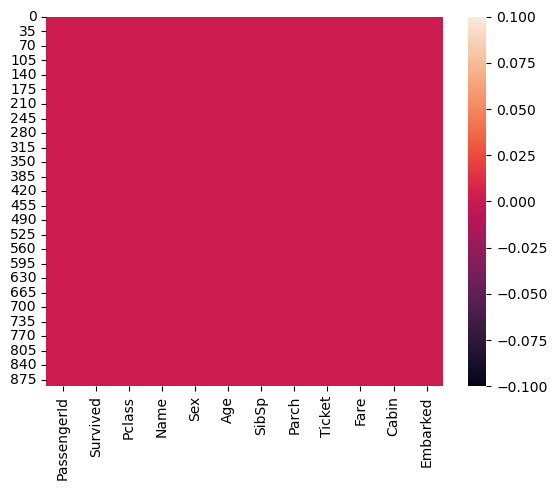

In [18]:
sns.heatmap(df.isnull())

<AxesSubplot:>

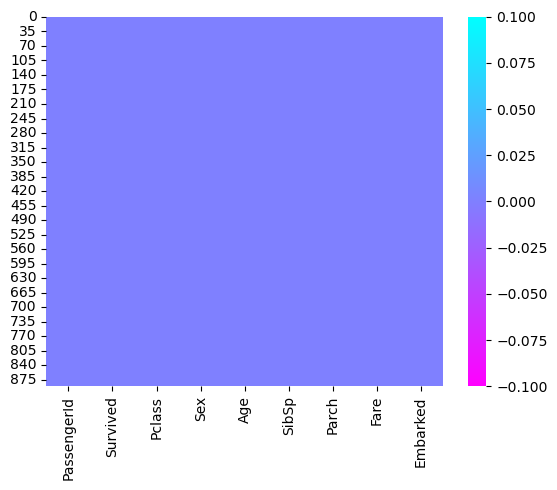

In [39]:
# Lets check the null values again
sns.heatmap(df.isnull(),cmap ="cool_r")

Data Dictionary

Survived: 0 = No, 1 = Yes
    
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    
sibsp: # of siblings / spouses aboard the Titanic
    
parch: # of parents / children aboard the Titanic
    
ticket: Ticket number
    
cabin: Cabin number
    
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
    
Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.

we can clearly visualize that there is no missing data present.

# Data Preprocessing:

Exploratory Data Analysis (EDA)

# Seperating Numerical and Categorical columns

In [22]:
# seperating Numerical and Categorical columns

# Checking for Categorical columns

categorical_col =[]

for i in df.dtypes.index:
    if df.dtypes[i] =="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

# Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print ("Numerical columns:",numerical_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [33]:
# Droping Name,Tickets,Cabin ID column
df=df.drop(columns=['Name'],axis=1)
df=df.drop(columns=['Ticket'])
df=df.drop(columns=['Cabin'])

These are the unique values present in the daraset. Here NAME,Ticket,Cabin  these feature that have irrelevent data there are all the unique value then we can drop them. 
Cabin, Ticket and Name
The two features Cabin and Ticket con't provide any useful infomation to our model and some are missing a lot of data. So best way to approch this is to simply remove them both. But for the Name feature we could extract titles and drop the original feature.



# Encoding categorical columns

In [34]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.000000,1,0,7.2500,2.0
1,2,1,1,0.0,38.000000,1,0,71.2833,0.0
2,3,1,3,0.0,26.000000,0,0,7.9250,2.0
3,4,1,1,0.0,35.000000,1,0,53.1000,2.0
4,5,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.000000,0,0,13.0000,2.0
887,888,1,1,0.0,19.000000,0,0,30.0000,2.0
888,889,0,3,0.0,29.699118,1,2,23.4500,2.0
889,890,1,1,1.0,26.000000,0,0,30.0000,0.0


In [35]:
# checking number of unique values in each column

df.nunique().to_frame("No.of unique values")

,No.of unique values
PassengerId,891
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,248
Embarked,3


In [24]:
# Checking the list of counts of target

df["Survived"].unique() 

array([0, 1], dtype=int64)

These are two categories present in the target column namenly “Yes” and “No”

In [25]:
# Checking the unique values in tagget column
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Statistical summary of numerical

In [36]:
# Statistical summary of numerical
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The means value is greater than the median(50%) in SibSp ,Parch,Fare,which means the data is skewed to right in these

3) The means value is less than the median(50%) in Pclass,Embarked,which means the data is skewed to left in these

4) By summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

5) We can also notice the standard deviation, min,25% percantile values from this describe method

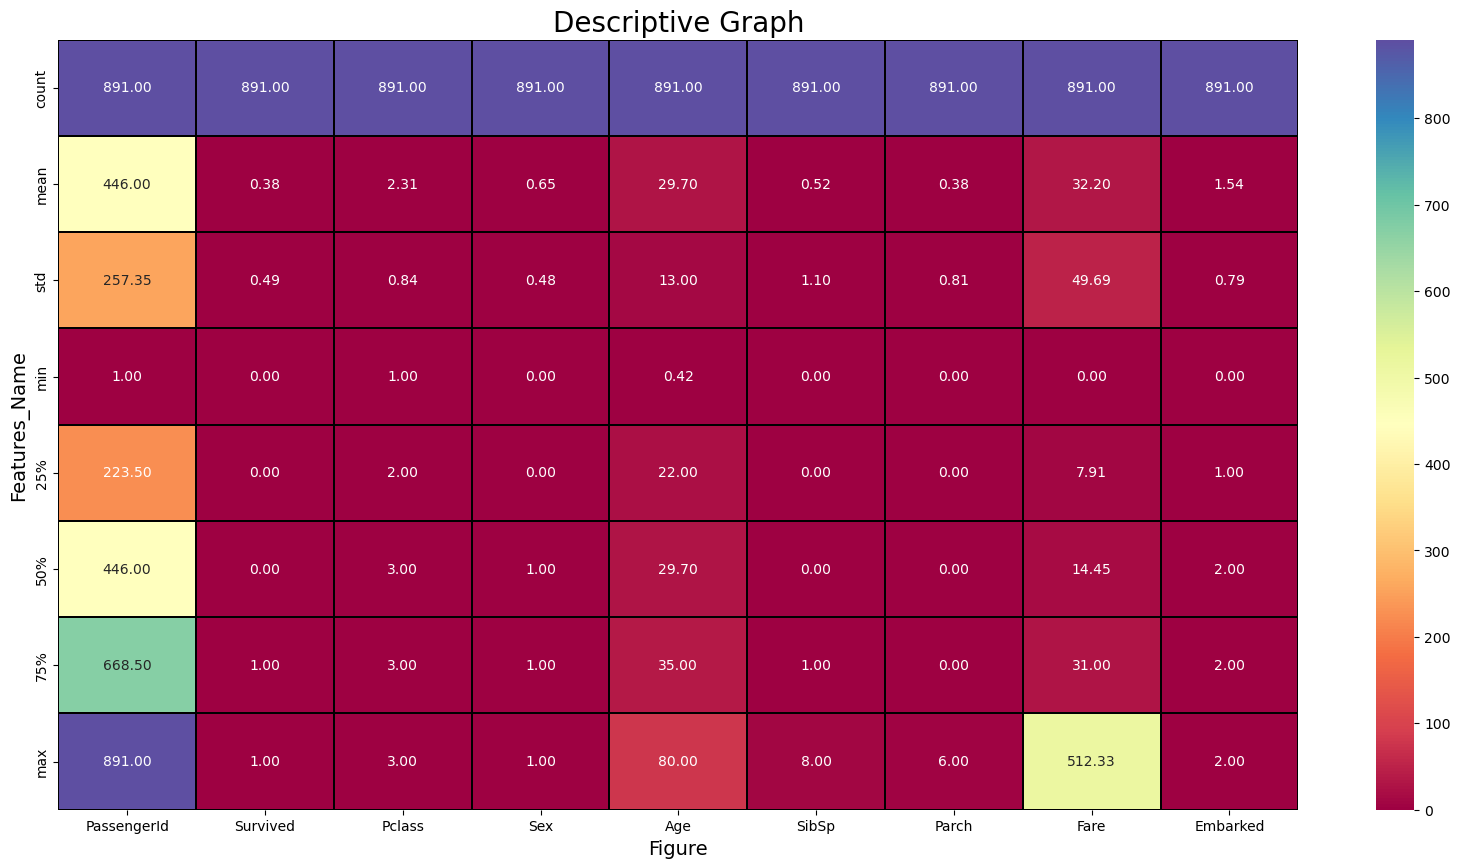

In [37]:
plt.figure(figsize =(20,10))
sns.heatmap(df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Data Visualization

Data visua;ization there are 3 parts

1.Univariate analysis : when we are considering only one column for the analysis. We are doing the anaysis on only single features(column) then we are saying it as Univariate analysis

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

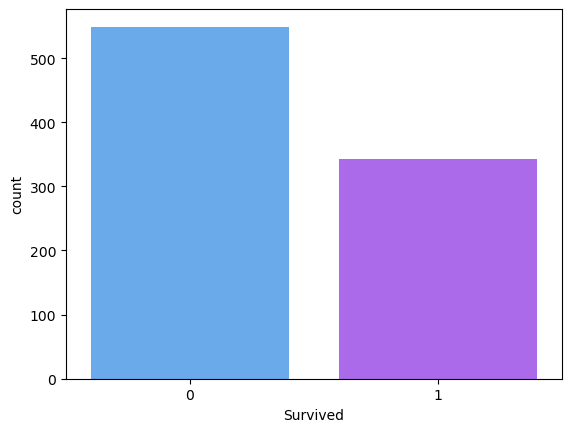

In [38]:
# Visualize the number of Churned customers

print(df['Survived'].value_counts())
sns.countplot(x= df['Survived'],palette ="cool")

We can observe the that the count of “No Survived” are high compared to the count of “Yes Survived” i.e there are more number of Passenge who have not survived.

This lead to class imbalance issue in the data. we will rectify it by using oversampling method in later part.

1.0    577
0.0    314
Name: Sex, dtype: int64


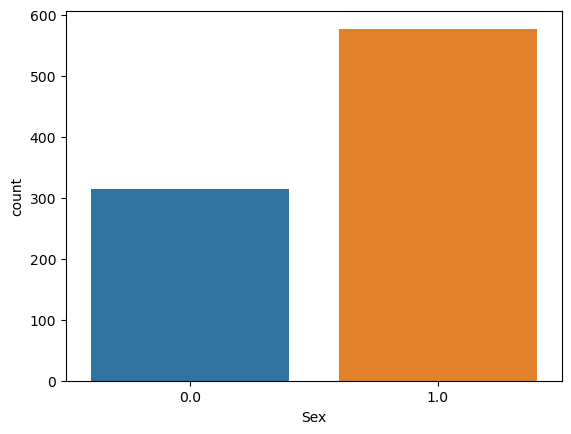

In [43]:
#Visualizing the count of Gender 

print(df ['Sex'].value_counts())
ax=sns.countplot(x='Sex',data=df)
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


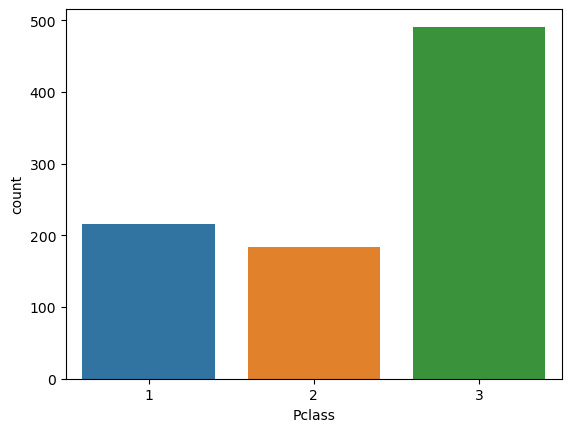

In [44]:
#Visualizing the count of Gender 

print(df ['Pclass'].value_counts())
ax=sns.countplot(x='Pclass',data=df)
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


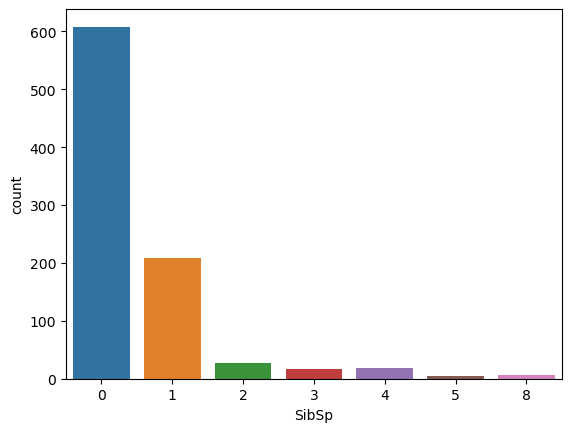

In [45]:
#Visualizing the count of Gender 

print(df ['SibSp'].value_counts())
ax=sns.countplot(x='SibSp',data=df)
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


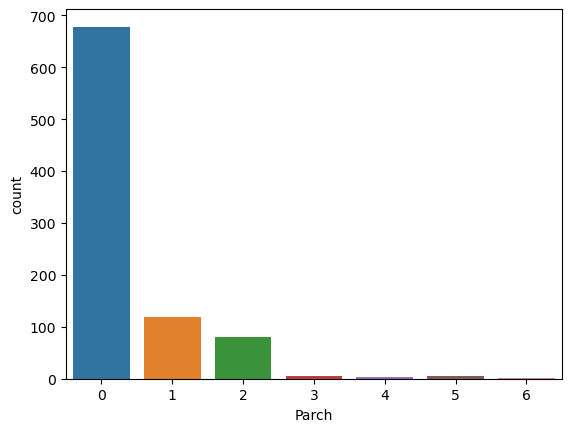

In [46]:

print(df ['Parch'].value_counts())
ax=sns.countplot(x='Parch',data=df)
plt.show()

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64


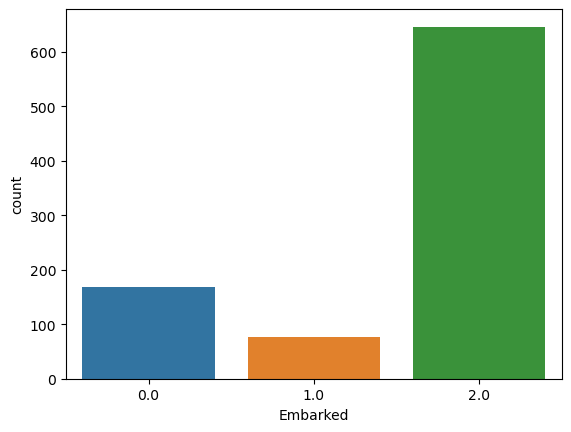

In [48]:
print(df ['Embarked'].value_counts())
ax=sns.countplot(x='Embarked',data=df)

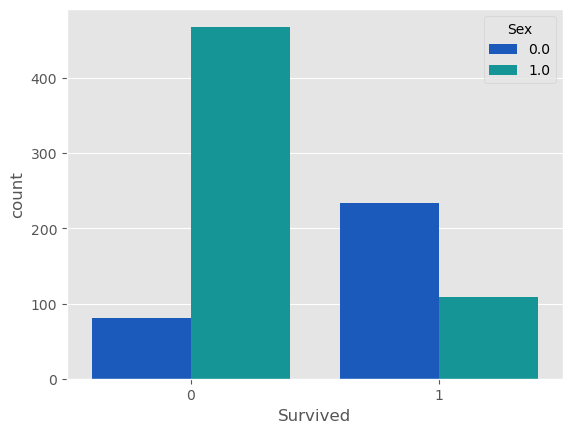

In [71]:
ax=sns.countplot(x='Survived',data=df, hue= 'Sex',palette = 'winter')

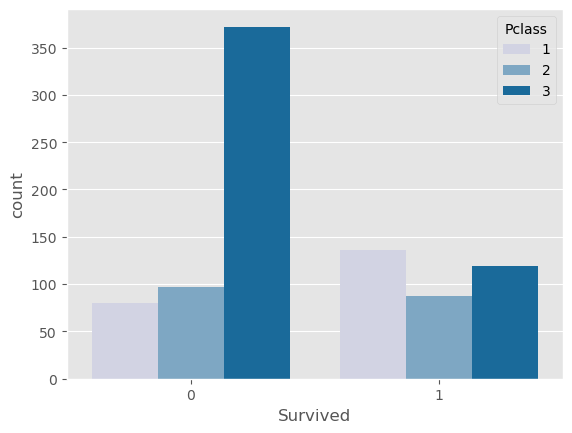

In [74]:
ax = sns.countplot(x='Survived', data=df, hue='Pclass', palette='PuBu')

The passenger  who did not survived  belong to  3rd class. 1st  class passenger are more likely to survive

<AxesSubplot:ylabel='Frequency'>

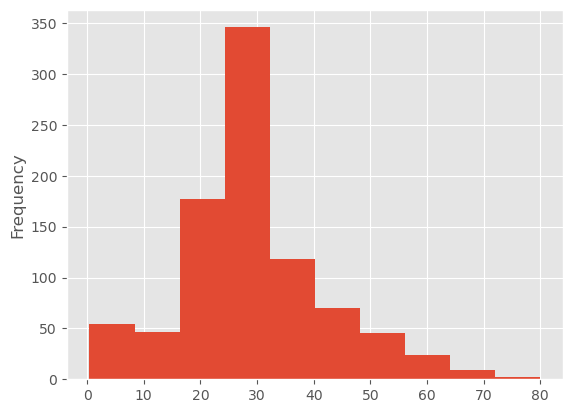

In [78]:
df['Age'].plot.hist()

we notice that  highest  age  group  travelling are among the young age between 20-40. Very few passager in age group 70-80

<AxesSubplot:ylabel='Frequency'>

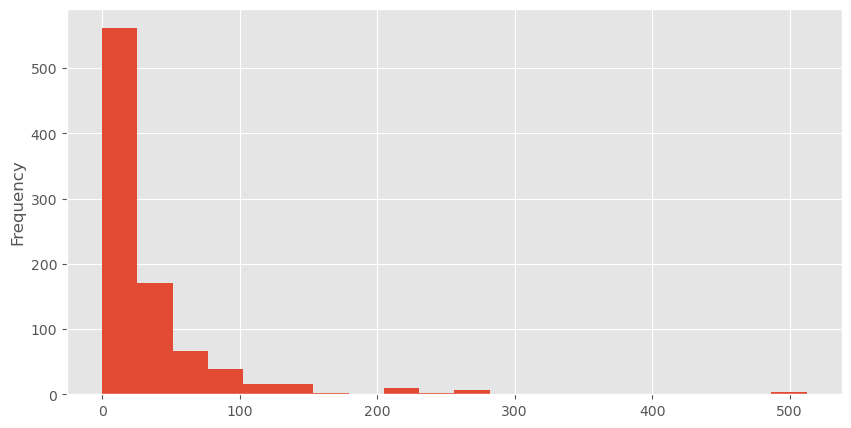

In [80]:
df['Fare'].plot.hist(bins=20, figsize = (10,5))

we observe  that most  of the tickets bought are under  fare 100, and very few are on the higher side of fare i.e 220-500 range

<AxesSubplot:xlabel='SibSp', ylabel='count'>

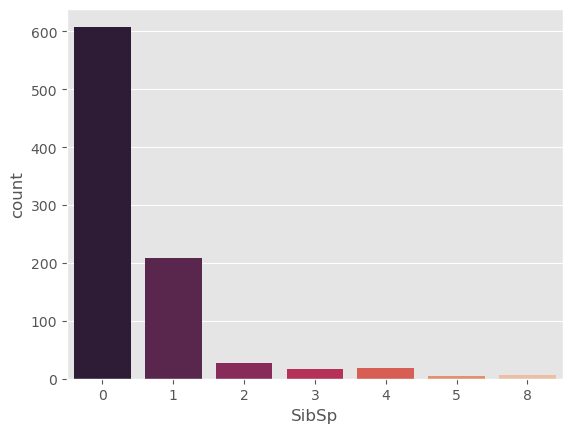

In [81]:
sns.countplot(x='SibSp', data=df, palette='rocket')

we notice that most of the passenger  do not  have their  siblings abroad.

<AxesSubplot:ylabel='Frequency'>

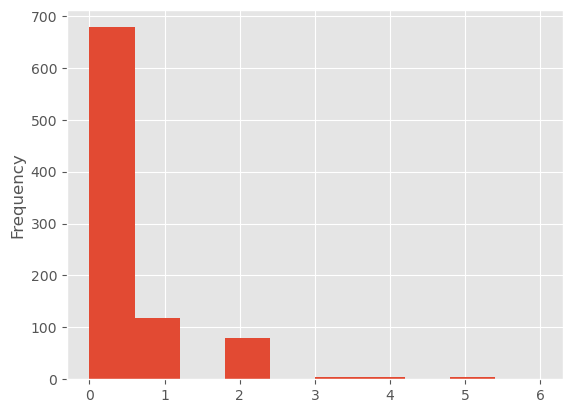

In [82]:
df['Parch'].plot.hist()

<AxesSubplot:xlabel='Parch', ylabel='count'>

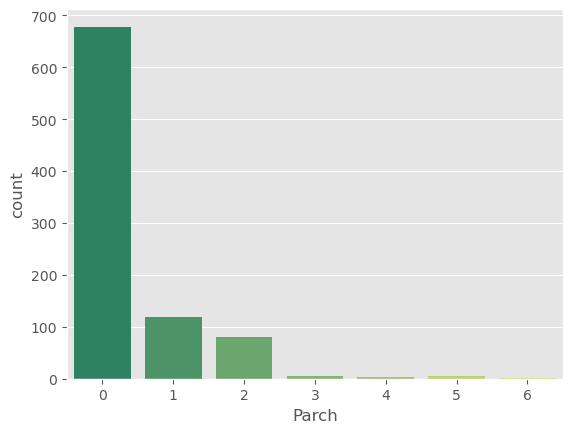

In [83]:
sns.countplot(x='Parch', data=df, palette='summer')

# Lets check how the data has been distributed in remaining in column

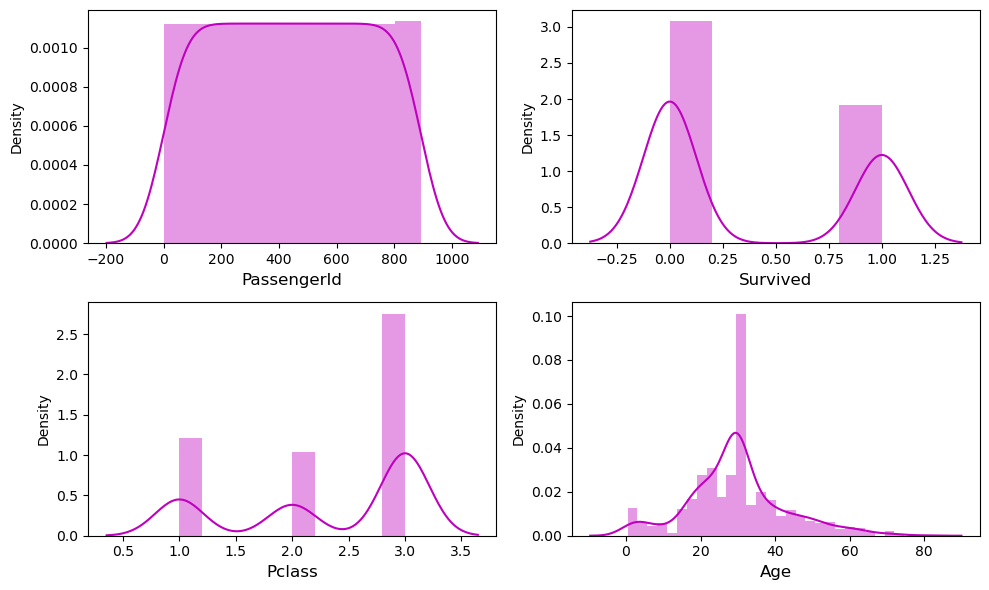

In [54]:
#lets check how the data has been distributed  in remaining in column:
plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

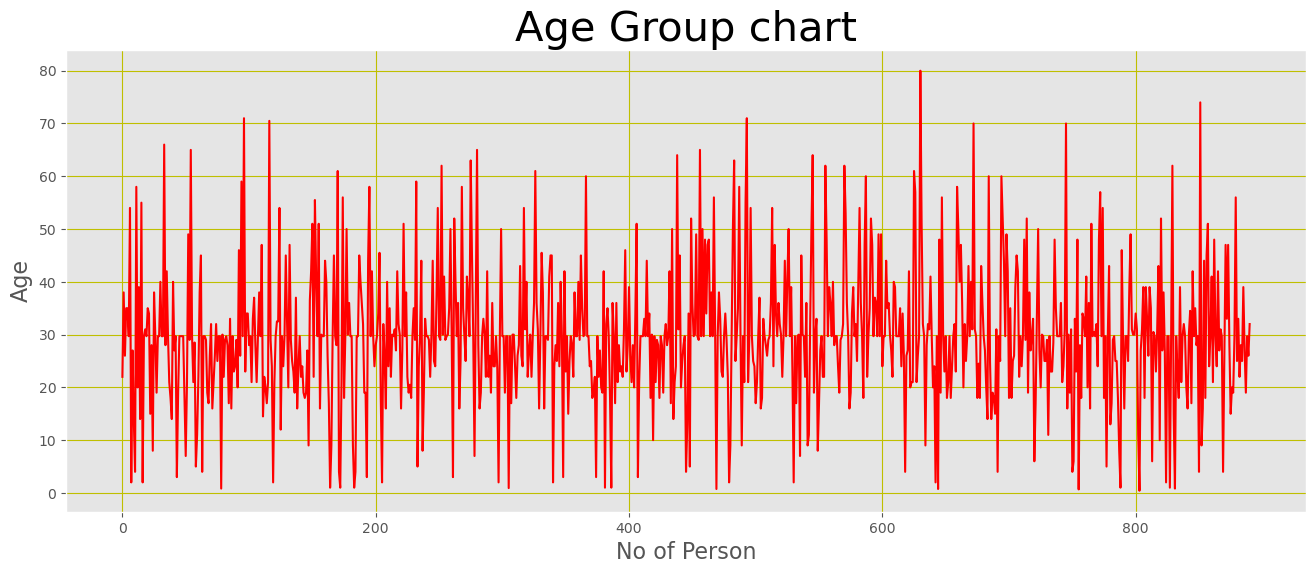

In [61]:
import matplotlib.pyplot as plt
from matplotlib import style

plt.figure(figsize=(16,6))
style.use("ggplot")
plt.plot(df['Age'],color='r')
plt.xlabel("No of Person",fontsize=16)
plt.ylabel("Age",fontsize=16)
plt.title("Age Group chart",fontsize=30)
plt.grid(True,color="y")
plt.show()

Data WRANGLING

In [84]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

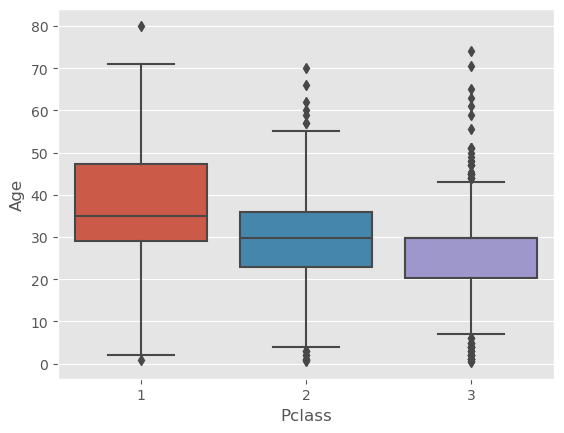

In [88]:
sns.boxplot(x='Pclass', y='Age', data=df)

we can observe that older age group  are travelling  more  in class 1 and 2 compare to 3 class. we can see here there are outlier

# 1. Survival Based On Passenger Class (P-Class)-

Text(0.5, 1.0, "Bar graph of people according to ticket class in which people couldn't survive")

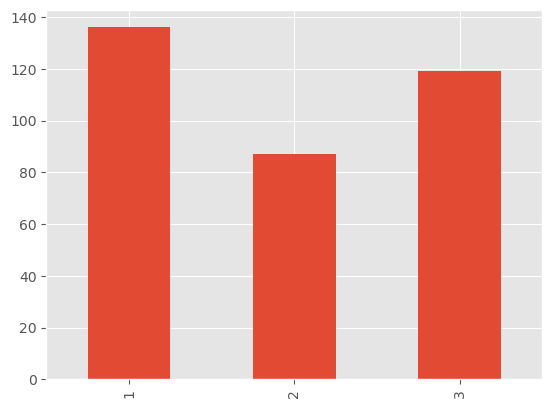

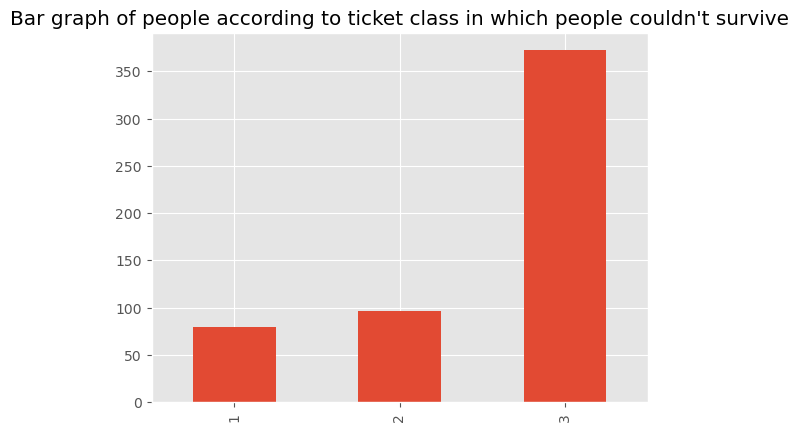

In [62]:
plt.figure(1)
df.loc[df['Survived']==1, 'Pclass'].value_counts().sort_index().plot.bar()

plt.figure(2)
df.loc[df['Survived']==0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people according to ticket class in which people couldn\'t survive')

# 2.Survival Based On Age:-

([<matplotlib.axis.XTick at 0x231a6632bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

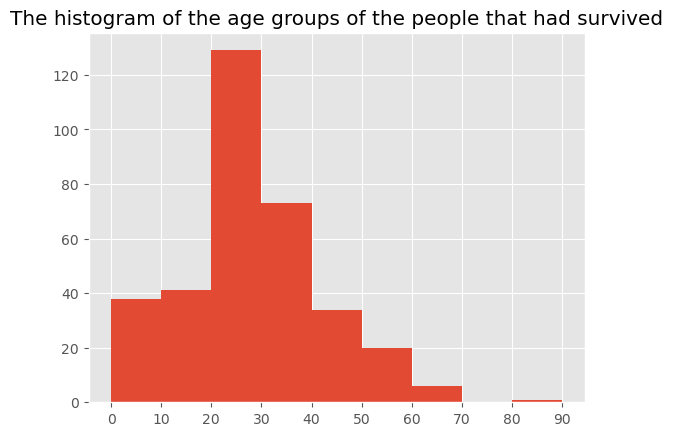

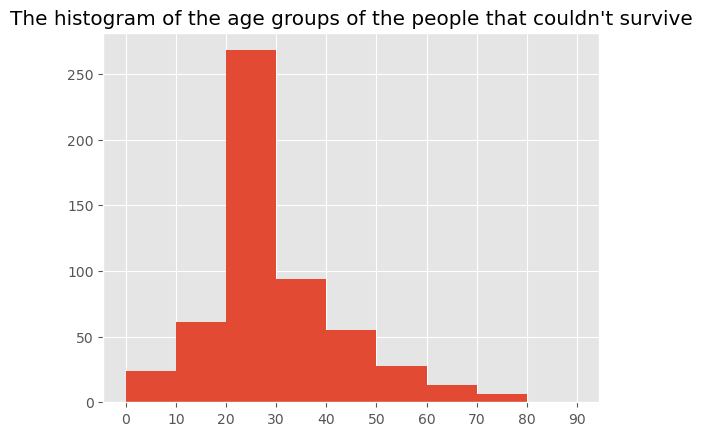

In [65]:
plt.figure(1)
age = df.loc[df['Survived']==1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age = df.loc[df['Survived']==0, 'Age']
plt.title('The histogram of the age groups of the people that couldn\'t survive')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


# 3. Survival Based Upon Embarked Label:-

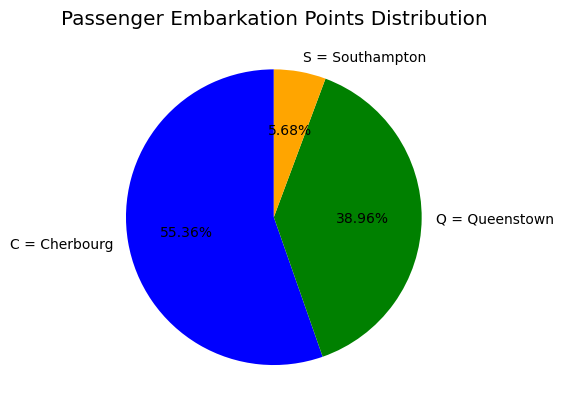

In [67]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
sizes = [55.36, 38.96, 100 - (55.36 + 38.96)]  # Calculate the percentage for 'S = Southampton'

# Create a figure and axis
fig, ax = plt.subplots()
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Plot the pie chart
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['blue', 'green', 'orange'])

# Set title
plt.title("Passenger Embarkation Points Distribution")

# Display the pie chart
plt.show()


# Feature Selection

# Correlation between target variable and independent variables

In [94]:
df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


This gives the correlation between the dependent and independent vatriables. We can visualize this by plotting heatmap.

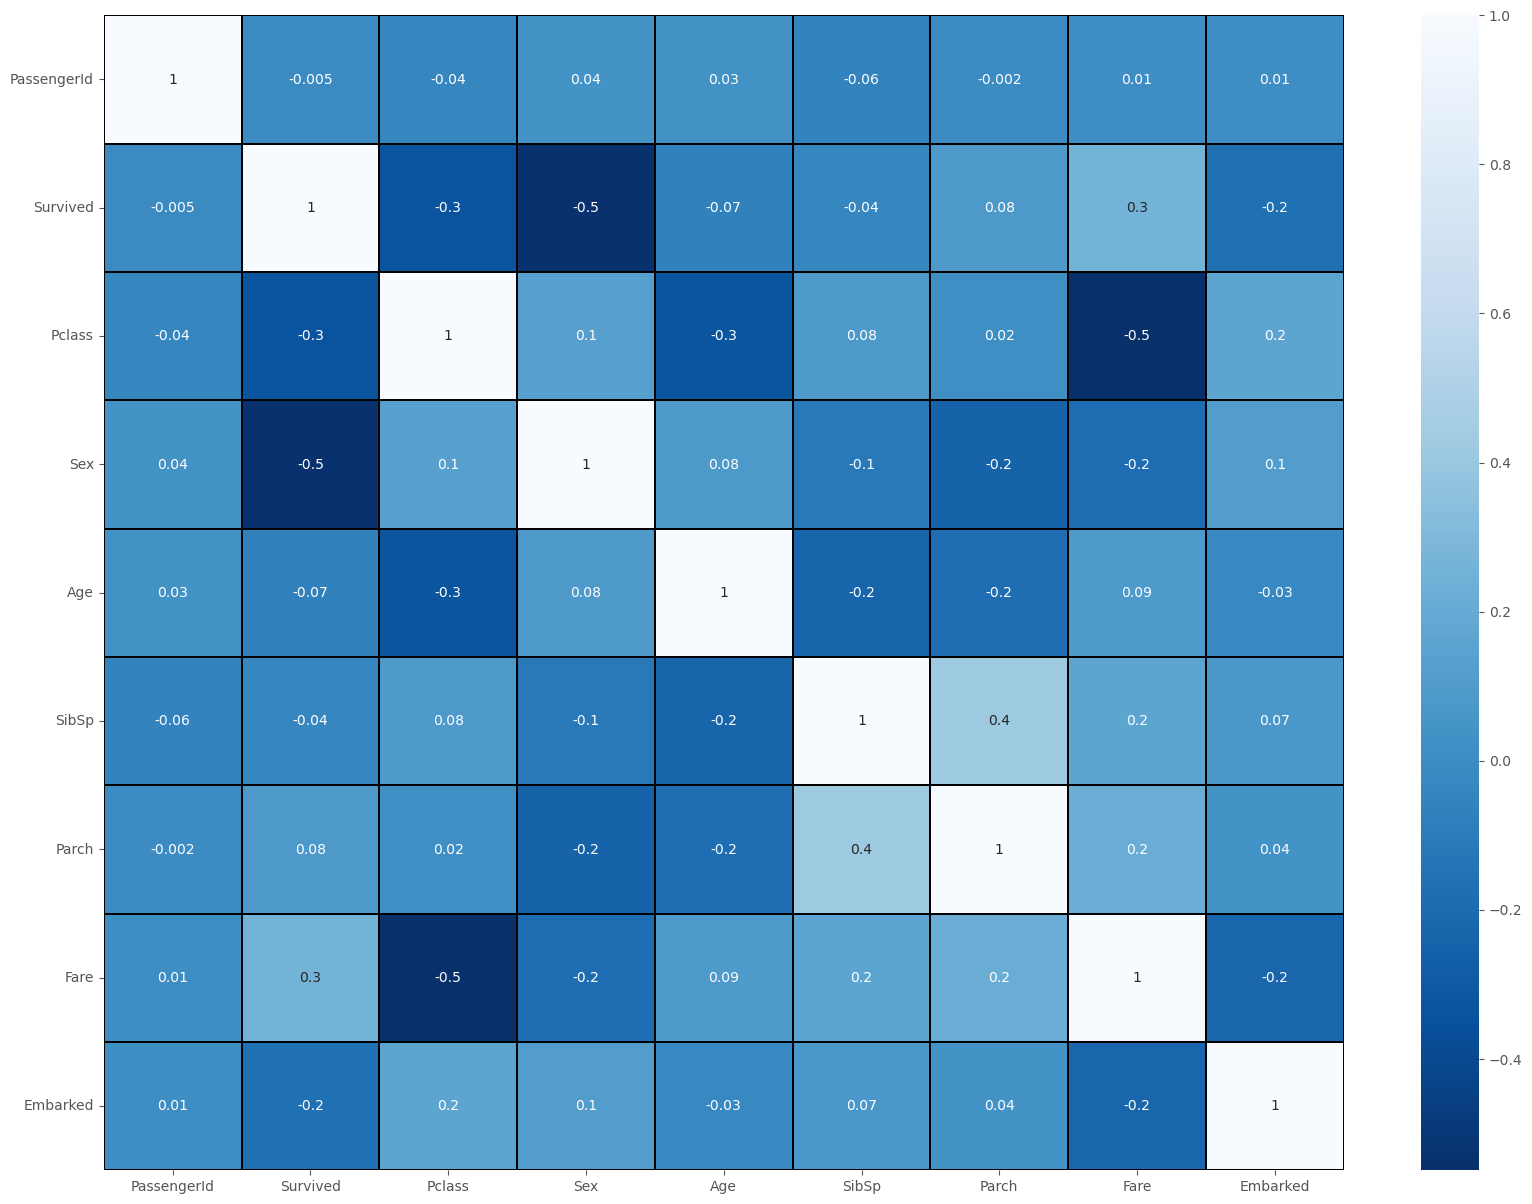

In [90]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

0- no relation, -0.3 to + 0.3 -less correlation , greater than 0.5 or greater than +0.5 -Moderate correaltion, Greater than -0.7 or greater than +0.7 high correlation

# Separating features and label:

In [98]:
x=df.drop('Survived',axis=1)
y=df['Survived']

# Features Scalling using standard Scalarization

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-1.730108,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.726220,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,-1.722332,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.718444,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,-1.714556,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954
...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.585954
887,1.718444,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.585954
888,1.722332,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.585954
889,1.726220,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.942303


In [100]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Modelling

In [102]:
pip install scikit-learn

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
maxAccu = 0
maxRS=0

In [105]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Creating train test split

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= maxRS)

Now Comes The Part Of Selecting An Algorithm For Training Our Model. I Prefer Taking Various Algorithms And Comparing Their Accuracy Score And Then Selecting The Best Fit Model Having The Maximum Score. 

In [115]:
model_result=pd.DataFrame(columns=['Model','Score'])

In [116]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['LogisticRegression',r2_score(y_test,pred_LR)]
model_result

,Model,Score
0,LogisticRegression,0.122619


In [117]:
from sklearn.svm import SVR

model=SVR()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['SVR',r2_score(y_test,pred_model)]
model_result

,Model,Score
0,LogisticRegression,0.122619
1,SVR,0.375032


In [118]:
from sklearn.neighbors import KNeighborsRegressor as KNN
model=KNN()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['KNN',r2_score(y_test,pred_model)]
model_result

,Model,Score
0,LogisticRegression,0.122619
1,SVR,0.375032
2,KNN,0.371476


In [120]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['DecisionTreeRegressor',r2_score(y_test,pred_model)]
model_result

,Model,Score
0,LogisticRegression,0.122619
1,SVR,0.375032
2,KNN,0.371476
3,DecisionTreeRegressor,-0.164524


In [122]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['LinearRegression',r2_score(y_test,pred_LR)]
model_result

,Model,Score
0,LogisticRegression,0.122619
1,SVR,0.375032
2,KNN,0.371476
3,DecisionTreeRegressor,-0.164524
4,LinearRegression,0.397152


In [123]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)
pred_model=model.predict(x_test)
pred_train=model.predict(x_train)

# accuracy score(y-test,y_pred)

model_result.loc[len(model_result)]=['GaussianNB',r2_score(y_test,pred_model)]
model_result


,Model,Score
0,LogisticRegression,0.122619
1,SVR,0.375032
2,KNN,0.371476
3,DecisionTreeRegressor,-0.164524
4,LinearRegression,0.397152
5,GaussianNB,0.090714


Now, Let’s Compare Their Scores To Find The Most Suitable Model For Our Problem.

# Conclusion

Final Model and Submission

In [124]:
# Make prediction
MLA=model
model = MLA[accuracy_df.index[0]]
model.fit(train_x, train_y)
pred = model.predict(test_x)

# Submission
submission_df = pd.DataFrame(data = {'PassengerId': test_df['PassengerId'], 'Survived': pred})
submission_df.to_csv(f'{path}/processed/submission.csv', index = False)
submission_df.head()

NameError: name 'accuracy_df' is not defined

Find the Best model

In [127]:
'AdaBoostClassifier': ensemble.AdaBoostClassifier()
MLA = {
    # Ensemble Methods
    'AdaBoostClassifier': ensemble.AdaBoostClassifier(),
    'BaggingClassifier': ensemble.BaggingClassifier(),
    'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(),
    'GradientBoostingClassifier': ensemble.GradientBoostingClassifier(),
    'RandomForestClassifier': ensemble.RandomForestClassifier(),

    # Gaussian Processes
    'GaussianProcessClassifier': gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    'LogisticRegressionCV': linear_model.LogisticRegressionCV(max_iter = 1000),
    'PassiveAggressiveClassifier': linear_model.PassiveAggressiveClassifier(),
    'RidgeClassifierCV': linear_model.RidgeClassifierCV(),
    'SGDClassifier': linear_model.SGDClassifier(),
    'Perceptron': linear_model.Perceptron(),
    
    # Navies Bayes
    'BernoulliNB': naive_bayes.BernoulliNB(),
    'GaussianNB': naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    'KNeighborsClassifier': neighbors.KNeighborsClassifier(),
    
    # SVM
    'SVC': svm.SVC(probability = True),
    'NuSVC': svm.NuSVC(probability = True),
    'LinearSVC': svm.LinearSVC(),
    
    # Trees    
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
    'ExtraTreeClassifier': tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    'LinearDiscriminantAnalysis': discriminant_analysis.LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': discriminant_analysis.QuadraticDiscriminantAnalysis(),

    # XGBoost
    'XGBClassifier': XGBClassifier()    
}

# Calculate accuracies
accuracies = []
for name, model in MLA.items():
  accuracy = k_fold(model)
  accuracies.append(accuracy)

# Create DataFrame
accuracy_df = pd.DataFrame(data = accuracies, index = MLA.keys(), columns = ['Accuracy']).sort_values(by = 'Accuracy', ascending = False)
accuracy_df

SyntaxError: illegal target for annotation (255584564.py, line 1)